# Data Visualization

In order to visualize the data, the following graphs were created:
1. Histogram of Sales
2. Boxplot of Sales
3. Histograms of numeric features
4. Scatterplot to check the relationship between the numeric features.
5. Boxplot of categorical features vs Sales.

In [ ]:
from sklearn.compose import make_column_selector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use("seaborn")

## Setting the Appearance of Charts

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

colors = ["#0466C8","#0353A4","#023E7D","#002855",
          "#001845","#001233","#33415C","#5C677D",
          "#7D8597","#979DAC","#CAF0F8","#ADE8F4",
          "#90E0EF","#48CAEA","#00B4D8","#0096C7",
          "#0077B6"]

font_title = {"size":20, "color":"#114B5F"}
font_label = {'color':  '#114B5F','size': 16}

In [3]:
df = pd.read_csv("../data/cleaned/dataset_cleaned.csv")
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


### Summary Statistics
Let's start our analysis of the data by examining the dataframe using the method describe.

In [4]:
df.describe().round(2)

,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.00,8523.00,8523.00
mean,0.07,140.99,2181.29
std,0.05,62.28,1706.50
min,0.00,31.29,33.29
25%,0.03,93.83,834.25
50%,0.05,143.01,1794.33
75%,0.09,185.64,3101.30
max,0.33,266.89,13086.96


From this we can observe that:
- The **mean in the Sales column is 2181.29**, the standard deviation is comparatively large that means that there is a lot of variance in the sales.
- There is a total of 8523 observations.
- The minimum sales is 33.29 dollars.
- The maximum of sales reported was 13089.96 dollars.

## Sales Distribution

Let's create a histogram and a boxplot to get a clear idea of the distribution of sales.

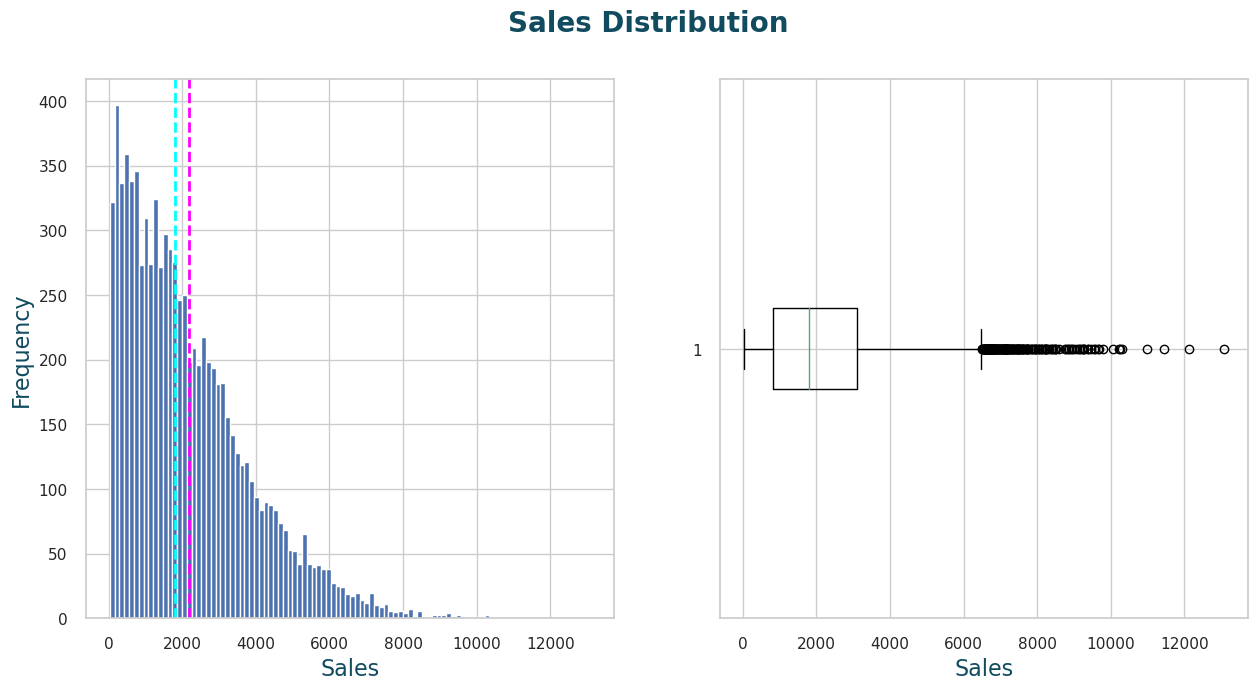

In [14]:
# get the column of interest
label = df['Item_Outlet_Sales']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(1, 2, figsize = (15,7), dpi=100)

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency', fontdict=font_label)

# Add lines for the mean and median
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2) # mean
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2) # median
ax[0].set_xlabel('Sales', fontdict=font_label)
# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Sales', fontdict=font_label)

# Add a title to the Figure
fig.suptitle('Sales Distribution', fontsize = 20, color="#114B5F", weight ='bold')

# Show the figure
plt.show()

The mean (and median) sales is closer to the low end of that range, with most of the data between 0 and around 6500 dollars. The few values above this are shown in the box plot as small circles, indicating that they are outliers.

### Relationship Between Numeric Features and Distributions.

 Now, let's look for relationships between the features and the sales label we want to be able to predict.

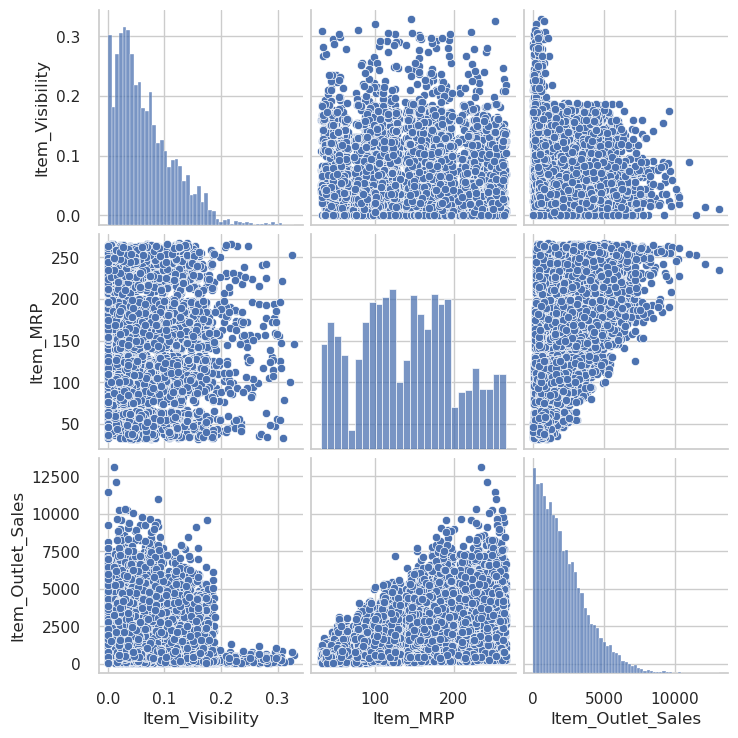

In [6]:
sns.pairplot(df[[ 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']])

Observations:
1. The **distribution** of the studied variables is **not normal**, it is **skewed to the right**.
2. Product that have a **price between 100 and 200**. presented higher sales
3. The **majority of the outlets** present **sales under 2500 dollars**.
4. The **visibility** of the products is not normal is **under the 20%** of the total display area of all products in a store.
5. The majority of the products have a visibility between 0 and 10%.
6. **There is no a evident correlation between variables**.

### Number of Sales by Categorical Features and Distributions Regarding Sales.

In [21]:
cat_features = make_column_selector(dtype_include="object")(df)

In [11]:
cat_features.remove('Item_Identifier')
cat_features

['Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Size']

{'Tier 1': '#0466C8', 'Tier 2': '#0353A4', 'Tier 3': '#023E7D'}
{'Grocery Store': '#0466C8', 'Supermarket Type1': '#0353A4', 'Supermarket Type2': '#023E7D', 'Supermarket Type3': '#002855'}
{'Regular': '#0466C8', 'Low Fat': '#0353A4'}
{'Soft Drinks': '#0466C8', 'Dairy': '#0353A4', 'Hard Drinks': '#023E7D', 'Fruits and Vegetables': '#002855', 'Snack Foods': '#001845', 'Canned': '#001233', 'Baking Goods': '#33415C', 'Frozen Foods': '#5C677D', 'Starchy Foods': '#7D8597', 'Seafood': '#979DAC', 'Meat': '#CAF0F8', 'Breakfast': '#ADE8F4', 'Breads': '#90E0EF', 'Health and Hygiene': '#48CAEA', 'Household': '#00B4D8', 'Others': '#0096C7'}
{'Small': '#0466C8', 'Medium': '#0353A4', 'Missing': '#023E7D', 'High': '#002855'}


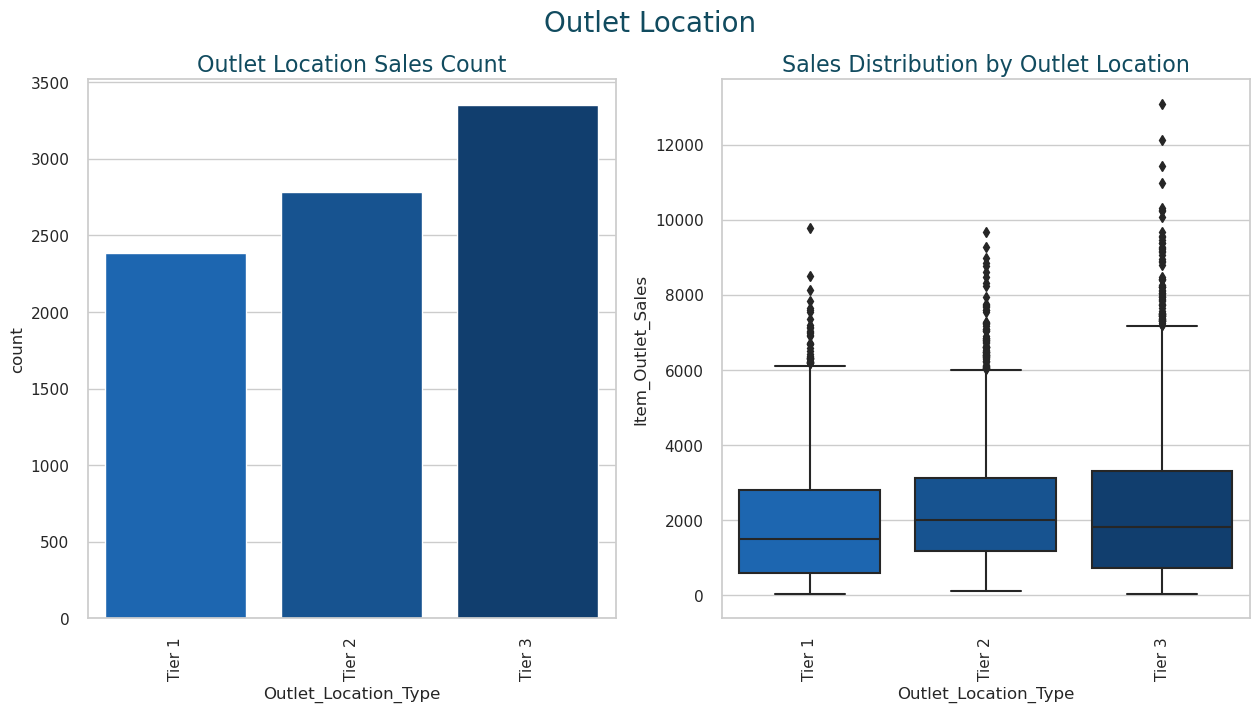

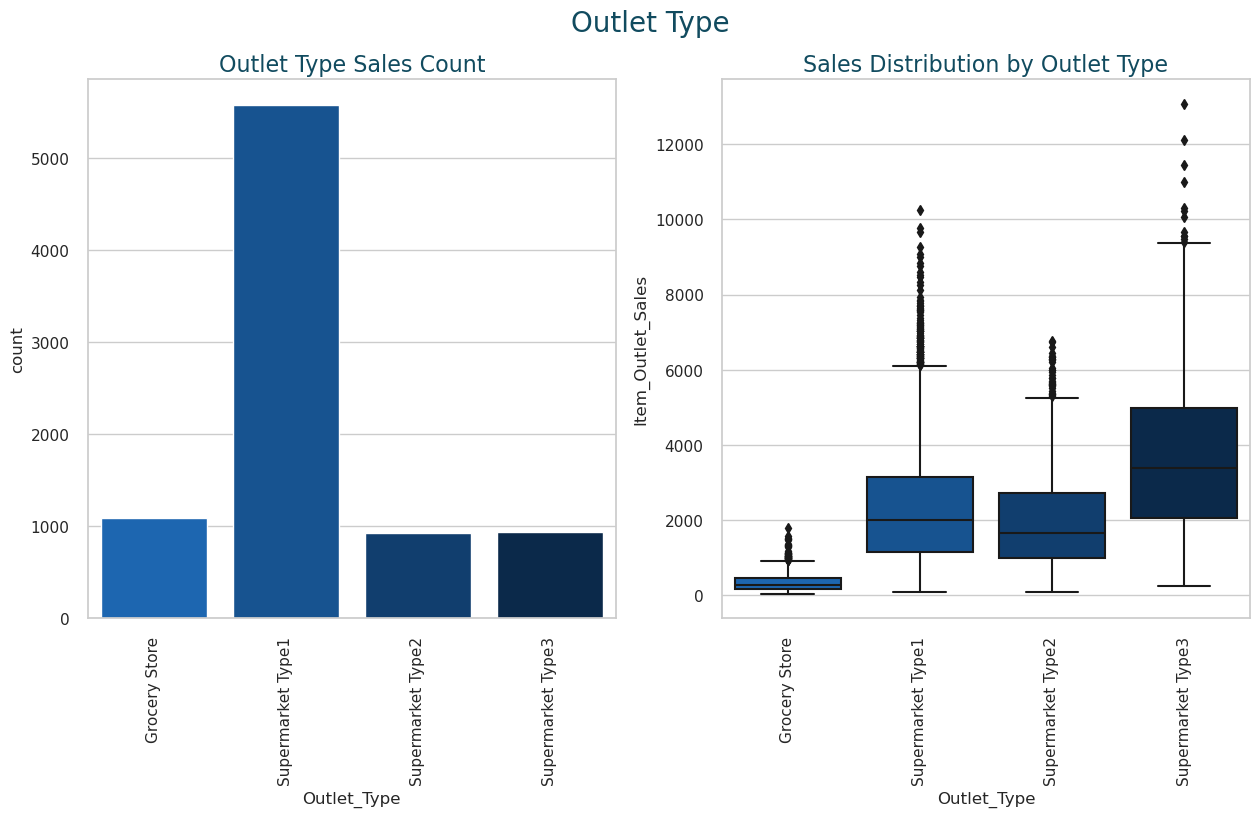

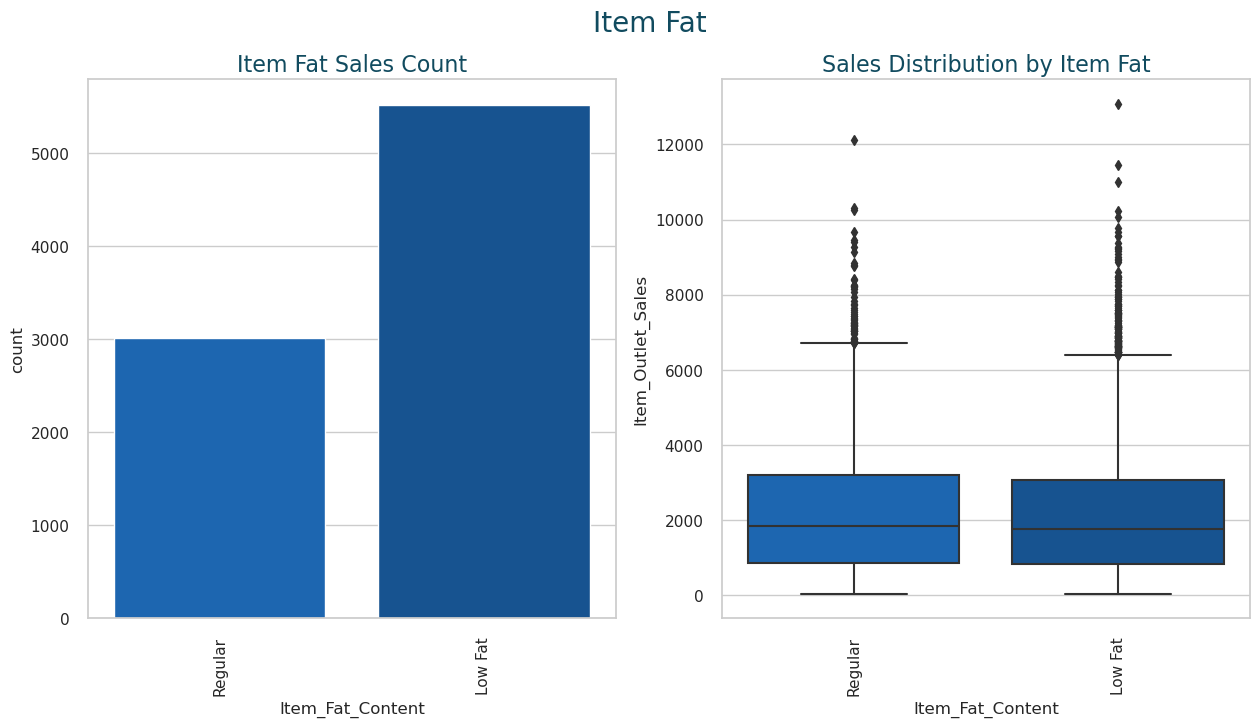

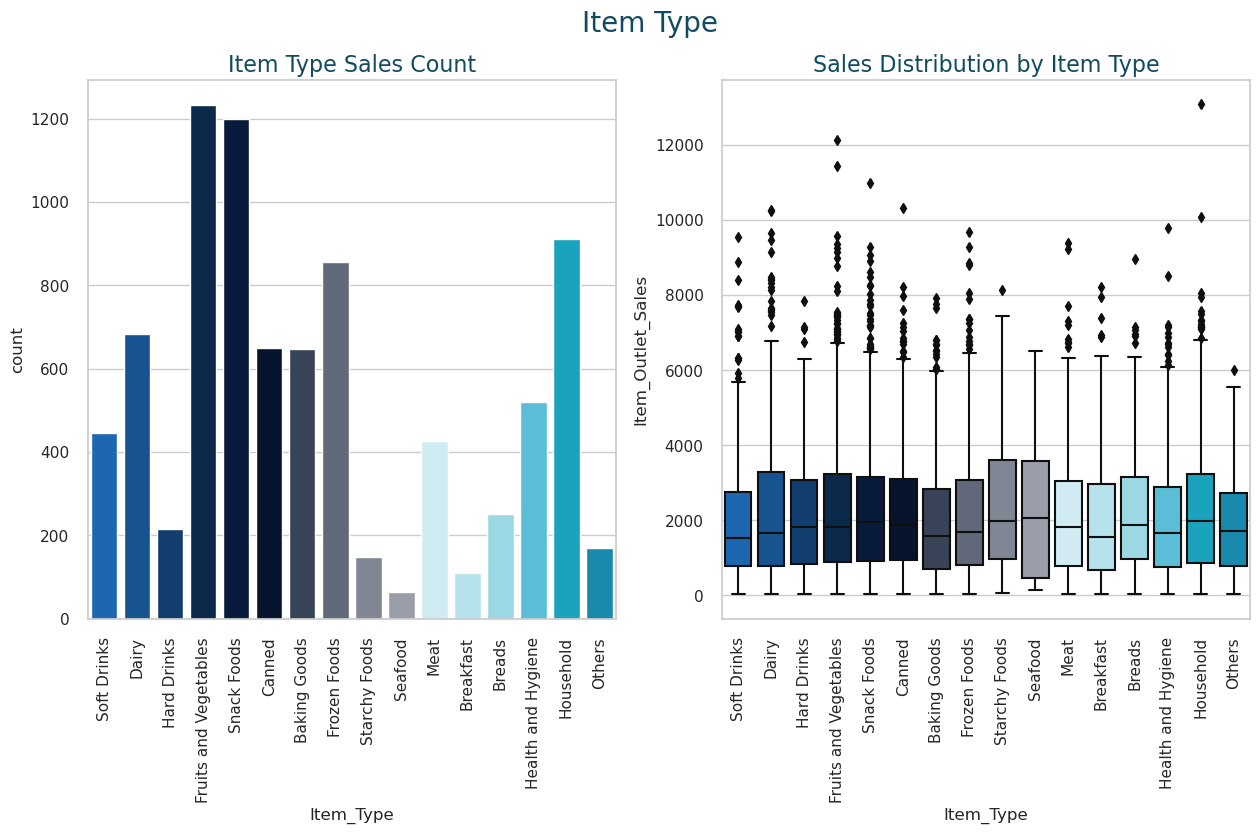

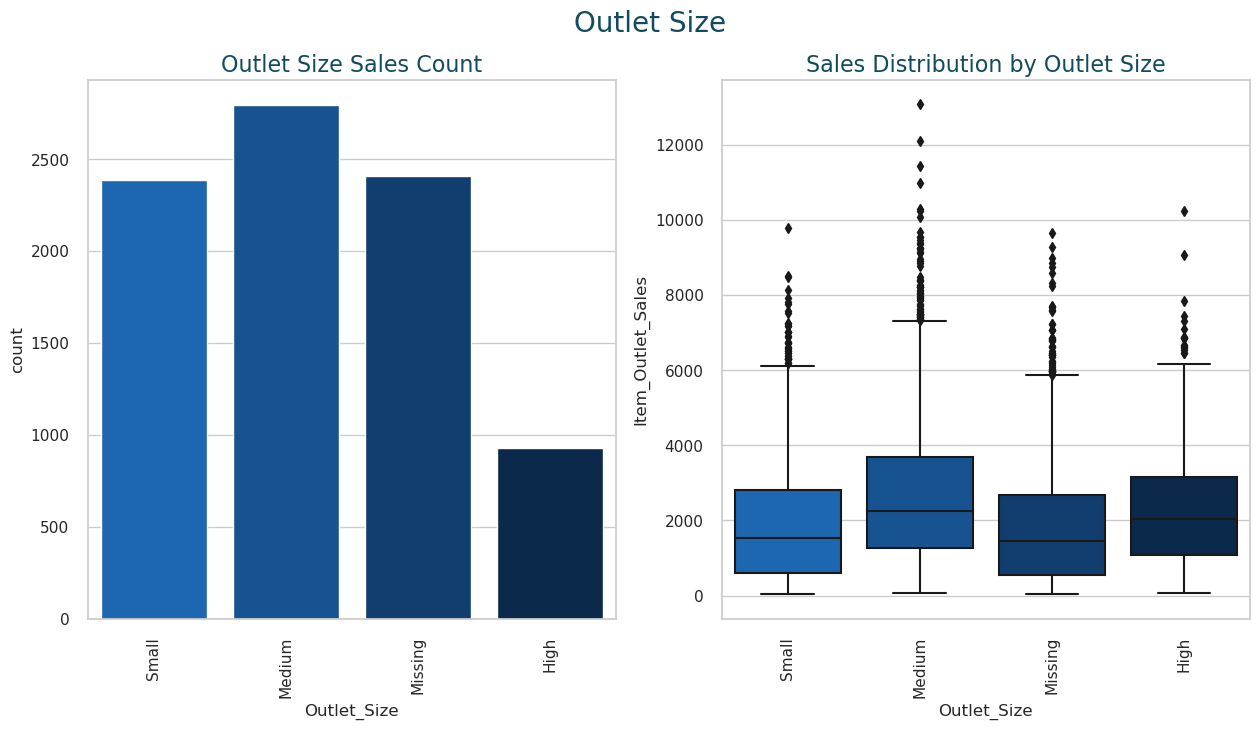

In [33]:
for col in cat_features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    dic = dict()
    count = 0
    col_name = col.split("_")[0] + " " + col.split("_")[1]
    for categorie in df[col].unique():
        dic[categorie] = colors[count]
        count += 1
    sns.countplot(
        ax= ax1,
        data=df,
        x=col,
        palette=dic
     )
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    ax1.set_title(col_name  + " Sales Count", fontdict=font_label)
    sns.boxplot(
        ax = ax2,
        data=df,
        x=col,
        y='Item_Outlet_Sales',
        palette=dic,
    )
    fig.suptitle(col_name, fontdict=font_title, size = 20)
    plt.xticks(rotation=90)
    ax2.set_title("Sales Distribution by " + col_name, fontdict=font_label)
    print(dic)

Observations:
1. Regarding the fat content, it can be said that product with low fat content are the best seller whit a 65% of sales. **But the difference in incomes by sales between products whit low or regular fat content is not significant**.
2. **The majority of sales is represented by the products of type "Fruits and Vegetables" and "Snack Foods"**. Whereas the products that generate most income are of the type "Seafood" and "Starchy Foods". 
3. Regarding the categorization by type of Item it is evident that **the sales of the product is quite variable, but the income is mostly uniform**.
4. Supermarkets Type3 present the sales the most significant. Whereas **the stores that generate most income are of the type "Supermarket Type1"**.
5. The majority of the stores are located in the city type **"Tier 3" and "Tier 2"** and is this location **type that generates more income**.
6. The majority of the stores are small and medium size, and the **stores with medium and high size generate more income**.
7. **The outlet OUT027 is the one that generates more income**, with a noticeable difference with the other outlets.

###  Sales by Location and Outlet Type
In order to identify the **percentage of sales in each type of store and the percentage of sales in each type of city**, the following pie charts were created:
1. Bar chart of the columns "Outlet_Type" vs "Sales", grouped by location, this to identify the percentage of sales in each type of store in each type of city.
2. Stack chart to observe the proportion of information by locations and by outlet type.

<h4 id="sales_by_outlet_type_and_location"> Bar Chart of Outlet Type vs Sales, Grouped by Location </h4>

In [22]:
sales_by_location_and_outlet_type =df.groupby(["Outlet_Location_Type", "Outlet_Type"])["Item_Outlet_Sales"].sum()
sales_by_location_and_outlet_type

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store        1.796941e+05
                      Supermarket Type1    4.302365e+06
Tier 2                Supermarket Type1    6.472314e+06
Tier 3                Grocery Store        1.883402e+05
                      Supermarket Type1    2.142664e+06
                      Supermarket Type2    1.851823e+06
                      Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [24]:
data_by_location = pd.DataFrame(sales_by_location_and_outlet_type).reset_index()
data_by_location

,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Tier 1,Grocery Store,1.796941e+05
1,Tier 1,Supermarket Type1,4.302365e+06
2,Tier 2,Supermarket Type1,6.472314e+06
3,Tier 3,Grocery Store,1.883402e+05
4,Tier 3,Supermarket Type1,2.142664e+06
5,Tier 3,Supermarket Type2,1.851823e+06
6,Tier 3,Supermarket Type3,3.453926e+06


In [133]:
tem = df.groupby("Outlet_Type")["Outlet_Location_Type"].count()
tem.apply(lambda x: x/sum(tem))

Outlet_Type
Grocery Store        0.127068
Supermarket Type1    0.654347
Supermarket Type2    0.108882
Supermarket Type3    0.109703
Name: Outlet_Location_Type, dtype: float64

Text(0.5, 0.98, 'Sales by Location and Outlet Type')

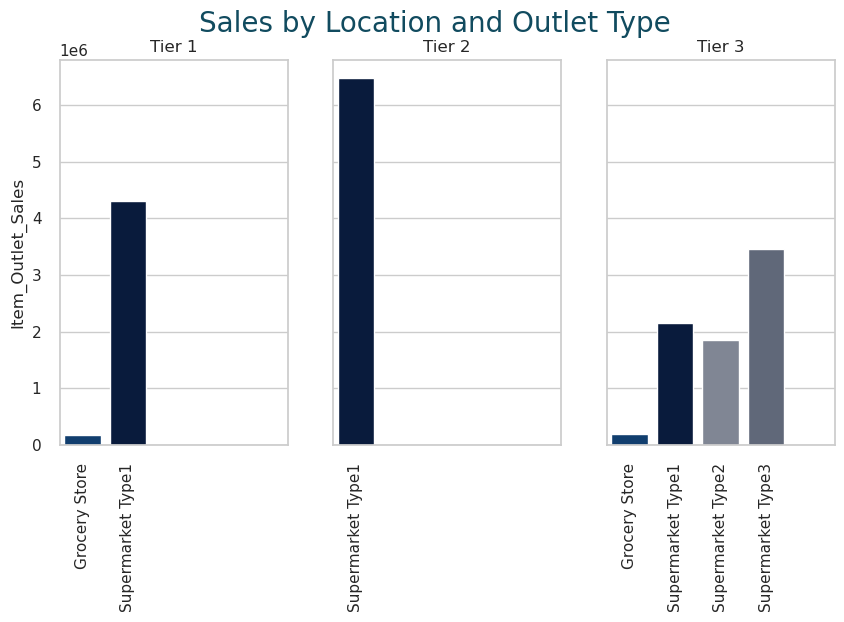

In [29]:
locations = np.array(df["Outlet_Location_Type"].unique()) 
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharey=True, figsize=(10,5)) # create 1x3 grid of axis subplots with shared y axis
axes = [ax1 ,ax2, ax3]
for n in range(len(axes)):
    values = sales_by_location_and_outlet_type[locations[n]] # get the values (sales) for each location
    (
        sns.
        barplot(data=data_by_location[data_by_location["Outlet_Location_Type"]==locations[n]],
                x="Outlet_Type",
                y="Item_Outlet_Sales",
                ax=axes[n],
                palette={'Grocery Store': '#023E7D',
                         'Supermarket Type1': '#001845',
                         'Supermarket Type2': '#7D8597',
                         'Supermarket Type3': '#5C677D'},
                dodge=False
               )
    )
    axes[n].tick_params( axis= "x", labelrotation=90)
    axes[n].set_title(locations[n])
    axes[n].set(xlabel=None)
    axes[n].set_xlim(-0.5,5-0.5)
    if n > 0:
        axes[n].set(ylabel=None) 
fig.suptitle("Sales by Location and Outlet Type", fontdict=font_title, size = 20)

Observations:
1. The outlet type **Supermarket Type 3 has the highest sales in Tier 3**.
2. The outlet type **Supermarket Type 1 has the highest sales in Tier 1 and Tier 2**. (representing the highest percentage of the total sales categorized by outlet type).

In [31]:
sales_by_location_and_item_type =df.groupby(["Outlet_Location_Type", "Item_Type"])["Item_Outlet_Sales"].sum()
sales_by_location_and_item_type

Outlet_Location_Type  Item_Type            
Tier 1                Baking Goods             3.267733e+05
                      Breads                   1.373086e+05
                      Breakfast                5.057683e+04
                      Canned                   3.279624e+05
                      Dairy                    3.709112e+05
                      Frozen Foods             4.743692e+05
                      Fruits and Vegetables    6.639191e+05
                      Hard Drinks              1.093117e+05
                      Health and Hygiene       2.569788e+05
                      Household                4.924949e+05
                      Meat                     2.122178e+05
                      Others                   9.383519e+04
                      Seafood                  3.947861e+04
                      Snack Foods              6.507110e+05
                      Soft Drinks              1.927637e+05
                      Starchy Foods            8.244668e

In [32]:
data_by_location_and_item_type = pd.DataFrame(sales_by_location_and_item_type).reset_index()

Text(0.5, 0.98, 'Sales by Location and Item Type')

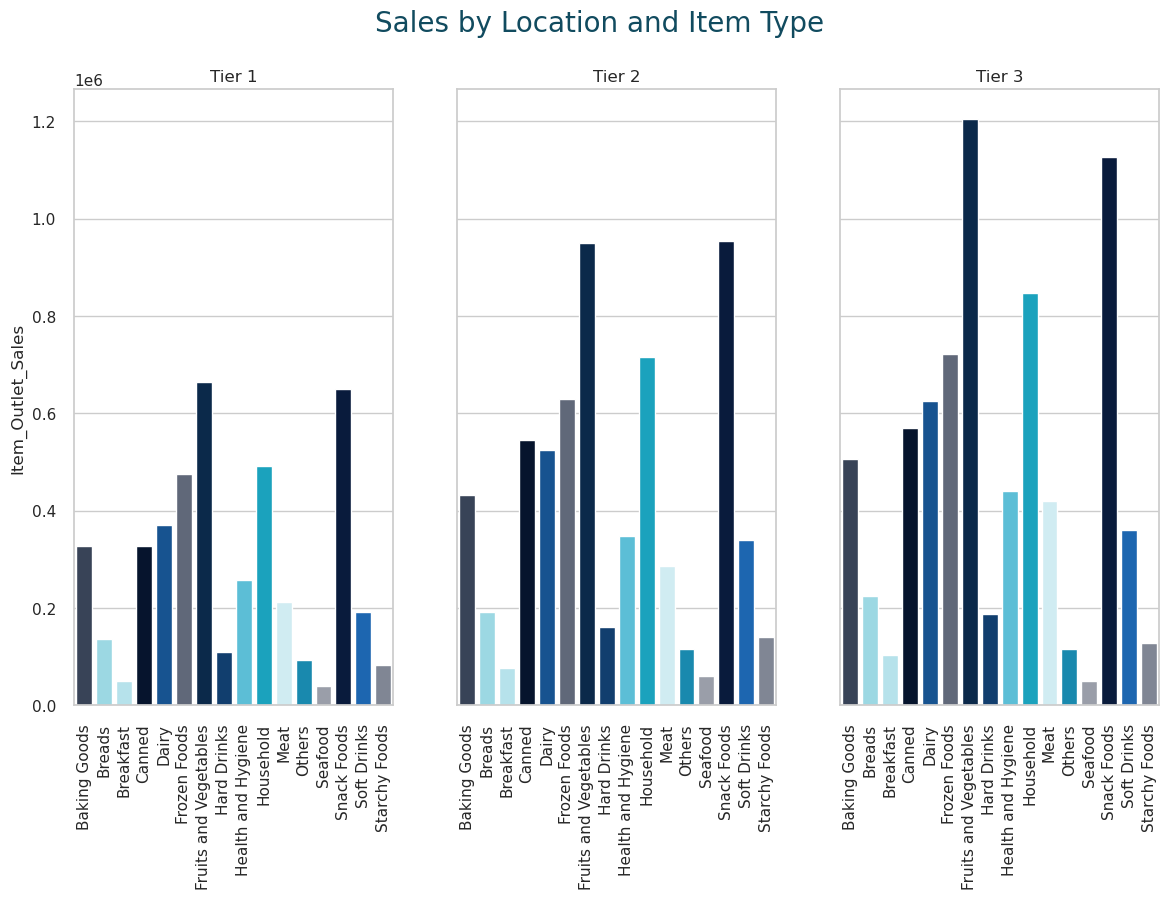

In [36]:
locations = np.array(df["Outlet_Location_Type"].unique()) 
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharey=True, figsize=(14,8)) # create 1x3 grid of axis subplots with shared y axis
axes = [ax1 ,ax2, ax3]
for n in range(len(axes)):
    values = sales_by_location_and_outlet_type[locations[n]] # get the values (sales) for each location
    (
        sns.
        barplot(data=data_by_location_and_item_type[data_by_location_and_item_type["Outlet_Location_Type"]==locations[n]],
                x="Item_Type",
                y="Item_Outlet_Sales",
                ax=axes[n],
                palette={'Soft Drinks': '#0466C8',
                         'Dairy': '#0353A4',
                         'Hard Drinks': '#023E7D',
                         'Fruits and Vegetables': '#002855',
                         'Snack Foods': '#001845',
                         'Canned': '#001233',
                         'Baking Goods': '#33415C',
                         'Frozen Foods': '#5C677D', 'Starchy Foods': '#7D8597',
                         'Seafood': '#979DAC', 'Meat': '#CAF0F8',
                         'Breakfast': '#ADE8F4',
                         'Breads': '#90E0EF',
                         'Health and Hygiene': '#48CAEA',
                         'Household': '#00B4D8',
                         'Others': '#0096C7'},
                dodge=False
               )
    )
    axes[n].tick_params( axis= "x", labelrotation=90)
    axes[n].set_title(locations[n])
    axes[n].set(xlabel=None)
    #axes[n].set_xlim(-0.5,5-0.5)
    if n > 0:
        axes[n].set(ylabel=None) 
fig.suptitle("Sales by Location and Item Type", fontdict=font_title, size = 20)
plt.show()

Having plotted the sales by item type and location it is clear that the sales present similar behaviour in all the locations. 

### Proportion of sales by location and item type

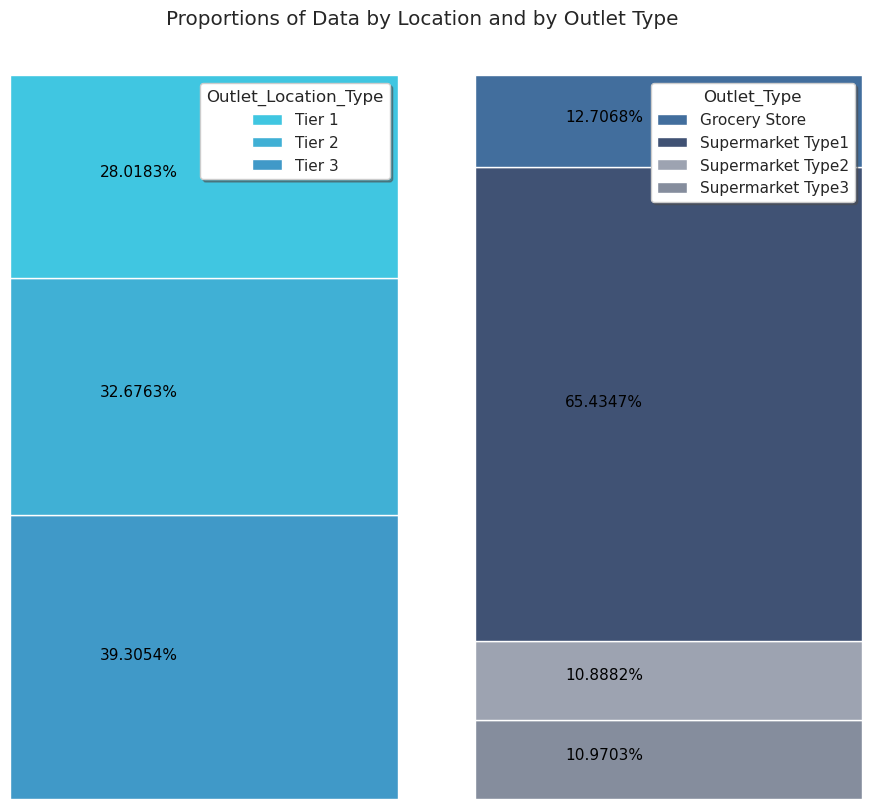

In [248]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, sharey=True) # create 1x2 grid of axis subplots
axes = [ax1 ,ax2]
ax_locations = (
    df
    .assign(Proporcion="")
    .pipe(
        lambda d:(
            sns.histplot(
                ax = ax1,
                data=d,
                x="Proporcion",
                hue="Outlet_Location_Type",
                multiple="fill",
                palette=[ '#00B4D8','#0096C7','#0077B6']
            )
        )
    )
)
ax_outlet_type = (
    df
    .assign(Proporcion="")
    .pipe(
        lambda d:(
            sns.histplot(
                ax=ax2,
                data=d,
                x="Proporcion",
                hue="Outlet_Type",
                multiple="fill",
                palette={'Grocery Store': '#023E7D',
                         'Supermarket Type1': '#001845',
                         'Supermarket Type2': '#7D8597',
                         'Supermarket Type3': '#5C677D'}
        )
        )
    )
)
# to change the legends location and activate the frame
sns.move_legend(ax1, "upper right", frameon=True, framealpha=1, shadow=True)
sns.move_legend(ax2, "upper right",frameon=True, framealpha=1, shadow=True) #bbox_to_anchor=(0.5, 1.08)
_ = fig.suptitle("Proportions of Data by Location and by Outlet Type", y= 0.95)

outlet_type_percentage = [0]
for bar in ax_outlet_type.get_children()[:4]:
    height = bar.get_height()
    outlet_type_percentage.append( round(height, 2))
    ax2.text(bar.get_x() + bar.get_width()/3, (height/2) - (height-sum(outlet_type_percentage)), str(round(bar.get_height() * 100,4)) + '%', 
                 ha='center', color='black', fontsize=11)
    
outlet_locations = [0]
for bar in ax_locations.get_children()[:3]:
    height = bar.get_height()
    outlet_locations.append( round(height, 2))
    ax1.text(bar.get_x() + bar.get_width()/3, (height/2) - (height-sum(outlet_locations)), str(round(bar.get_height() * 100,4)) + '%', 
                 ha='center', color='black', fontsize=11)
    
ax1.set_axis_off()
ax2.set_axis_off()

Observations:
1. The type of store that sells the most is the Supermarket Type 1, representing 65.43% of sales.
2. The type of store that generates the least sales is the Supermarket Type 2 with 10.89% of sales.
3. The type of city that generates the most sales is Tier 3 with 40% of sales.
4. The type of city that generates the least sales is Tier 1 with 28%.

## Percentage of Revenue by Outlet Type

In [233]:
total_sales = sum(df["Item_Outlet_Sales"])

In [234]:
total_sales

18591125.41040007

In [235]:
sales_percentage_by_Outlet_Type = data_by_location_outlet.groupby("Outlet_Type")["Item_Outlet_Sales"].sum()
sales_percentage_by_Outlet_Type = sales_percentage_by_Outlet_Type.apply(lambda x: x/total_sales).reset_index()
sales_percentage_by_Outlet_Type

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,0.019796
1,Supermarket Type1,0.694812
2,Supermarket Type2,0.099608
3,Supermarket Type3,0.185784


In [212]:
sales_percentage_by_Outlet_Type_tr = sales_percentage_by_Outlet_Type[["Item_Outlet_Sales"]].transpose()
sales_percentage_by_Outlet_Type_tr.columns = (sales_percentage_by_Outlet_Type ["Outlet_Type"])
sales_percentage_by_Outlet_Type_tr

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,0.019796,0.694812,0.099608,0.185784


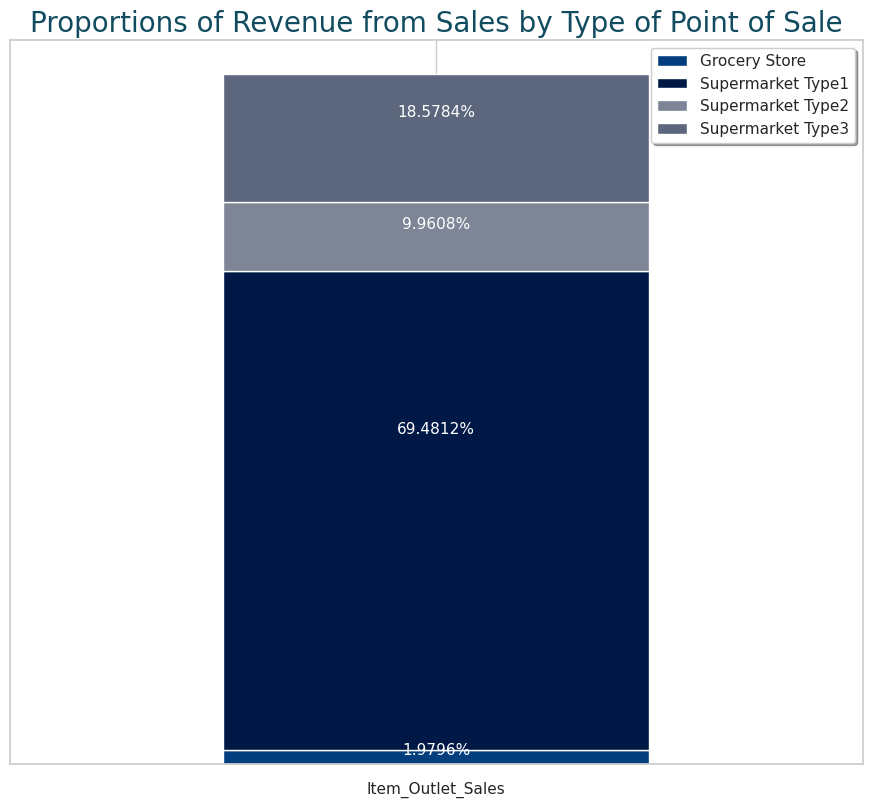

In [251]:
bars = sales_percentage_by_Outlet_Type_tr.plot(kind='bar', stacked=True, color=['#023E7D', '#001845', '#7D8597', '#5C677D'])
outlet_type_percentage = [0]
for bar in bars.get_children()[:4]:
    height = bar.get_height()
    outlet_type_percentage.append( round(height, 2))
    plt.gca().text(bar.get_x() + bar.get_width()/2,
                   (height/1.5) - (height-sum(outlet_type_percentage)),
                   str(round(bar.get_height() * 100,4)) + '%', 
                   ha='center', color='w', fontsize=11)
plt.xticks(rotation=0)
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend(frameon=True, framealpha=1, shadow=True)
plt.title("Proportions of Revenue from Sales by Type of Point of Sale", fontdict=font_title)
plt.show()

Observations: 
1. The **supermarkets type 1** presents the highest percentage of revenue with **70% over the total**.
2. **Groceries stores** are the type of outlet with the lowest percentage of revenue representing only **2% over the total**.

## Percentage of Revenue by Location

In [236]:
sales_percentage_by_location = df.groupby(["Outlet_Location_Type"])["Item_Outlet_Sales"].sum()
sales_percentage_by_location =  sales_percentage_by_location.apply(lambda x: x/total_sales).reset_index()
sales_percentage_by_location 

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 1,0.241086
1,Tier 2,0.348140
2,Tier 3,0.410774


In [227]:
sales_percentage_by_location_tr = sales_percentage_by_location[["Item_Outlet_Sales"]].transpose()
sales_percentage_by_location_tr.columns = (sales_percentage_by_location["Outlet_Location_Type"])
sales_percentage_by_location_tr

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Item_Outlet_Sales,0.241086,0.34814,0.410774


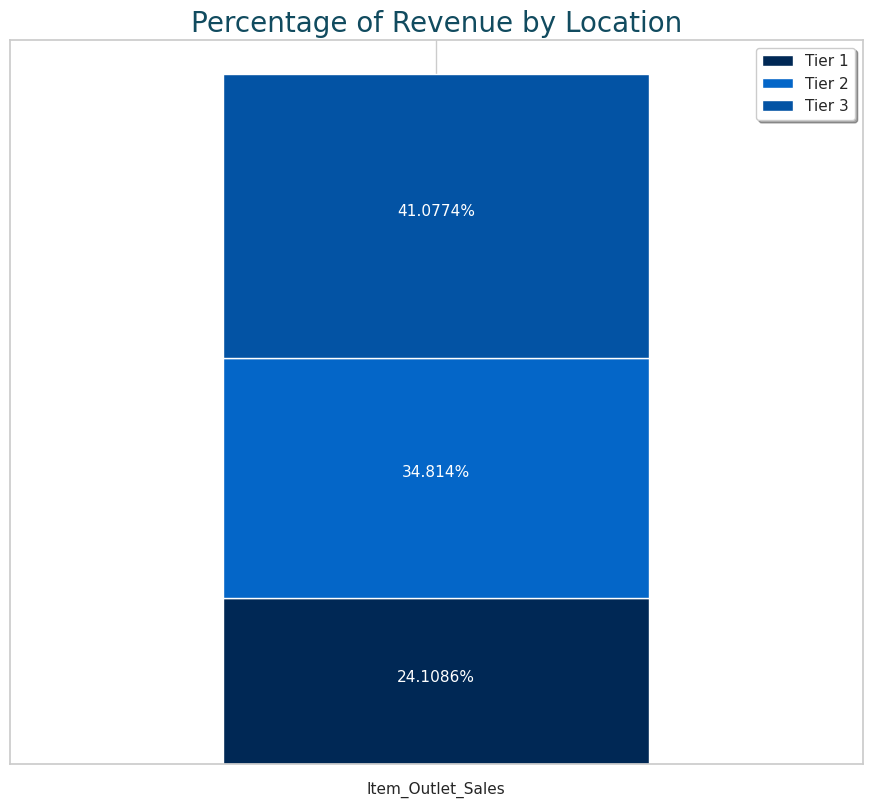

In [252]:
bars = sales_percentage_by_location_tr.plot(kind='bar', stacked=True, color=['#002855','#0466C8', '#0353A4'])
outlet_location_sales_percentage = [0]
for bar in bars.get_children()[:3]:
    height = bar.get_height()
    outlet_location_sales_percentage.append( round(height, 2))
    plt.gca().text(bar.get_x() + bar.get_width()/2,
                   (height/2) - (height-sum(outlet_location_sales_percentage)),
                   str(round(bar.get_height() * 100,4)) + '%', 
                   ha='center', color='w', fontsize=11)
plt.xticks(rotation=0)
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend(frameon=True, framealpha=1, shadow=True)
plt.title("Percentage of Revenue by Location", fontdict=font_title)
plt.show()

Observations:
1. The location type **Tier 3 has highest percentage of sales** representing 41% of the revenue.
2. The location with the **lowest percentage of revenue** is **Tier1**.